## Predict fuel efficiency Using Linear regression Tensorflow

In [ ]:
import numpy as np
import tensorflow as tf
print(tf.__version__)
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers

2.0.0


In [172]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")


In [173]:
dataset_path

'/Users/mayur/.keras/datasets/auto-mpg.data'

In [174]:

column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
df = pd.read_csv(dataset_path, sep=" ", names = column_names,skipinitialspace=True, na_values="?",comment='\t')
df.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [175]:
df.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [176]:
df=df.dropna()

In [177]:
df.count()


MPG             392
Cylinders       392
Displacement    392
Horsepower      392
Weight          392
Acceleration    392
Model Year      392
Origin          392
dtype: int64

In [178]:
df.size
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [179]:
df.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [180]:
df['Origin'] = df['Origin'].map(lambda x: {1: 'USA', 2: 'Europe', 3: 'Japan'}.get(x))
df = pd.get_dummies(df, prefix='', prefix_sep='')
df.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [185]:
train_df=df.sample(frac=0.8,random_state=0)
test_df= df.drop(train_df.index)
train_df.count()
test_df.count()

MPG             78
Cylinders       78
Displacement    78
Horsepower      78
Weight          78
Acceleration    78
Model Year      78
Europe          78
Japan           78
USA             78
dtype: int64

In [186]:
train_labels = train_df.pop('MPG')
test_labels = test_df.pop('MPG')

In [189]:
test_labels.values

array([15. , 10. ,  9. , 25. , 19. , 14. , 14. , 13. , 18. , 35. , 25. ,
       19. , 13. , 28. , 13. , 14. , 15. , 13. , 18. , 12. , 16. , 24. ,
       19. , 24. , 31. , 26. , 16. , 24. , 18. , 20. , 29. , 18. , 19. ,
       22. , 26. , 17.5, 22.5, 29. , 29. , 20. , 32. , 28. , 13. , 43.1,
       36.1, 32.8, 20.5, 20.8, 18.1, 27.5, 30.9, 17. , 29.5, 16.5, 15.5,
       18.5, 31.9, 34.1, 19.1, 27.9, 44.3, 32.4, 26.6, 23.5, 30. , 39.1,
       34.1, 34.4, 33. , 28.1, 22.4, 26.6, 28. , 34. , 36. , 34. , 32. ,
       28. ])

In [192]:
from sklearn import preprocessing

def normalize_data(df):
    x = df.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    return  pd.DataFrame(x_scaled)

norm_train = normalize_data(train_df)
norm_test = normalize_data(test_df)

In [194]:
norm_test.tail()

,0,1,2,3,4,5,6,7,8
73,0.2,0.127273,0.219780,0.249601,0.693431,1.0,0.0,0.0,1.0
74,0.2,0.106061,0.142857,0.117140,0.496350,1.0,1.0,0.0,0.0
75,0.2,0.115152,0.120879,0.201724,0.613139,1.0,0.0,1.0,0.0
76,0.2,0.063636,0.104396,0.112352,0.525547,1.0,0.0,1.0,0.0
77,0.2,0.151515,0.170330,0.323013,0.737226,1.0,0.0,0.0,1.0


In [203]:
len(norm_train.keys())

9

In [204]:
norm_train.keys() #this gives the number of columns

RangeIndex(start=0, stop=9, step=1)

In [206]:
norm_train.count()

0    314
1    314
2    314
3    314
4    314
5    314
6    314
7    314
8    314
dtype: int64

In [210]:
def build_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=[len(norm_train.keys())]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [211]:
model = build_model()

In [212]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [217]:
example_batch = norm_train[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.203065  ],
       [-0.28506818],
       [-0.321046  ],
       [-0.25943345],
       [-0.5766379 ],
       [-0.3269879 ],
       [-0.5736211 ],
       [-0.13528664],
       [-0.2731957 ],
       [-0.44455948]], dtype=float32)

In [229]:
# history = model.fit(norm_train.shuffle(10000).batch(512),
#                     epochs=20,
#                     validation_data=norm_test.batch(512),
#                     verbose=1)


num_epochs = 500
history = model.fit(norm_train, train_labels, epochs=num_epochs, validation_data=(norm_test, test_labels), verbose=2)

Train on 314 samples, validate on 78 samples
Epoch 1/500
314/314 - 0s - loss: 7.8401 - mae: 1.9777 - mse: 7.8401 - val_loss: 6.0364 - val_mae: 1.8796 - val_mse: 6.0364
Epoch 2/500
314/314 - 0s - loss: 7.7852 - mae: 1.9635 - mse: 7.7852 - val_loss: 6.3624 - val_mae: 1.8668 - val_mse: 6.3624
Epoch 3/500
314/314 - 0s - loss: 7.5719 - mae: 1.9617 - mse: 7.5719 - val_loss: 6.5910 - val_mae: 1.8752 - val_mse: 6.5910
Epoch 4/500
314/314 - 0s - loss: 7.6603 - mae: 1.9831 - mse: 7.6603 - val_loss: 6.2382 - val_mae: 1.8931 - val_mse: 6.2382
Epoch 5/500
314/314 - 0s - loss: 7.8376 - mae: 1.9995 - mse: 7.8376 - val_loss: 6.5624 - val_mae: 1.8895 - val_mse: 6.5624
Epoch 6/500
314/314 - 0s - loss: 7.5352 - mae: 1.9633 - mse: 7.5352 - val_loss: 6.8575 - val_mae: 1.9311 - val_mse: 6.8575
Epoch 7/500
314/314 - 0s - loss: 7.6732 - mae: 2.0100 - mse: 7.6732 - val_loss: 6.5736 - val_mae: 1.8767 - val_mse: 6.5736
Epoch 8/500
314/314 - 0s - loss: 7.7433 - mae: 1.9874 - mse: 7.7433 - val_loss: 6.4762 - val_m

Epoch 66/500
314/314 - 0s - loss: 7.1863 - mae: 1.9071 - mse: 7.1863 - val_loss: 6.1341 - val_mae: 1.8882 - val_mse: 6.1341
Epoch 67/500
314/314 - 0s - loss: 7.3458 - mae: 1.9488 - mse: 7.3458 - val_loss: 7.3962 - val_mae: 1.9966 - val_mse: 7.3962
Epoch 68/500
314/314 - 0s - loss: 7.4082 - mae: 1.9414 - mse: 7.4082 - val_loss: 6.7214 - val_mae: 1.8902 - val_mse: 6.7214
Epoch 69/500
314/314 - 0s - loss: 7.2080 - mae: 1.9055 - mse: 7.2080 - val_loss: 6.0331 - val_mae: 1.8502 - val_mse: 6.0331
Epoch 70/500
314/314 - 0s - loss: 7.3929 - mae: 1.9585 - mse: 7.3929 - val_loss: 6.1040 - val_mae: 1.8446 - val_mse: 6.1040
Epoch 71/500
314/314 - 0s - loss: 7.2252 - mae: 1.9388 - mse: 7.2252 - val_loss: 6.4804 - val_mae: 1.8389 - val_mse: 6.4804
Epoch 72/500
314/314 - 0s - loss: 7.3680 - mae: 1.9413 - mse: 7.3680 - val_loss: 6.5402 - val_mae: 1.8619 - val_mse: 6.5402
Epoch 73/500
314/314 - 0s - loss: 7.2704 - mae: 1.9684 - mse: 7.2704 - val_loss: 6.0760 - val_mae: 1.8909 - val_mse: 6.0760
Epoch 74

Epoch 132/500
314/314 - 0s - loss: 7.2108 - mae: 1.9024 - mse: 7.2108 - val_loss: 6.2364 - val_mae: 1.8520 - val_mse: 6.2364
Epoch 133/500
314/314 - 0s - loss: 7.2007 - mae: 1.9154 - mse: 7.2007 - val_loss: 6.0872 - val_mae: 1.8281 - val_mse: 6.0872
Epoch 134/500
314/314 - 0s - loss: 7.0802 - mae: 1.8901 - mse: 7.0802 - val_loss: 5.9696 - val_mae: 1.8327 - val_mse: 5.9696
Epoch 135/500
314/314 - 0s - loss: 6.9739 - mae: 1.8779 - mse: 6.9739 - val_loss: 5.8251 - val_mae: 1.8198 - val_mse: 5.8251
Epoch 136/500
314/314 - 0s - loss: 7.0146 - mae: 1.8862 - mse: 7.0146 - val_loss: 5.9224 - val_mae: 1.8208 - val_mse: 5.9224
Epoch 137/500
314/314 - 0s - loss: 7.0227 - mae: 1.8981 - mse: 7.0227 - val_loss: 5.8565 - val_mae: 1.8428 - val_mse: 5.8565
Epoch 138/500
314/314 - 0s - loss: 6.9340 - mae: 1.8971 - mse: 6.9340 - val_loss: 6.7845 - val_mae: 1.9157 - val_mse: 6.7845
Epoch 139/500
314/314 - 0s - loss: 7.2434 - mae: 1.9274 - mse: 7.2434 - val_loss: 5.9061 - val_mae: 1.8146 - val_mse: 5.9061


Epoch 198/500
314/314 - 0s - loss: 6.8256 - mae: 1.8912 - mse: 6.8256 - val_loss: 5.7406 - val_mae: 1.7991 - val_mse: 5.7406
Epoch 199/500
314/314 - 0s - loss: 6.9594 - mae: 1.8896 - mse: 6.9594 - val_loss: 6.0175 - val_mae: 1.8347 - val_mse: 6.0175
Epoch 200/500
314/314 - 0s - loss: 6.7100 - mae: 1.8500 - mse: 6.7100 - val_loss: 6.8454 - val_mae: 1.9537 - val_mse: 6.8454
Epoch 201/500
314/314 - 0s - loss: 6.7415 - mae: 1.8528 - mse: 6.7415 - val_loss: 5.7523 - val_mae: 1.8111 - val_mse: 5.7523
Epoch 202/500
314/314 - 0s - loss: 6.7541 - mae: 1.8722 - mse: 6.7541 - val_loss: 5.8972 - val_mae: 1.8479 - val_mse: 5.8972
Epoch 203/500
314/314 - 0s - loss: 6.7662 - mae: 1.8993 - mse: 6.7662 - val_loss: 5.8974 - val_mae: 1.8330 - val_mse: 5.8974
Epoch 204/500
314/314 - 0s - loss: 6.9458 - mae: 1.9110 - mse: 6.9458 - val_loss: 5.8599 - val_mae: 1.8144 - val_mse: 5.8599
Epoch 205/500
314/314 - 0s - loss: 6.8547 - mae: 1.8892 - mse: 6.8547 - val_loss: 6.7103 - val_mae: 1.9458 - val_mse: 6.7103


Epoch 264/500
314/314 - 0s - loss: 6.6208 - mae: 1.8462 - mse: 6.6208 - val_loss: 5.6889 - val_mae: 1.8266 - val_mse: 5.6889
Epoch 265/500
314/314 - 0s - loss: 6.7370 - mae: 1.8466 - mse: 6.7370 - val_loss: 5.9631 - val_mae: 1.8465 - val_mse: 5.9631
Epoch 266/500
314/314 - 0s - loss: 6.6227 - mae: 1.8485 - mse: 6.6227 - val_loss: 6.5316 - val_mae: 1.9110 - val_mse: 6.5316
Epoch 267/500
314/314 - 0s - loss: 6.5572 - mae: 1.8415 - mse: 6.5572 - val_loss: 5.7978 - val_mae: 1.8211 - val_mse: 5.7978
Epoch 268/500
314/314 - 0s - loss: 6.6262 - mae: 1.8570 - mse: 6.6262 - val_loss: 5.8563 - val_mae: 1.8631 - val_mse: 5.8563
Epoch 269/500
314/314 - 0s - loss: 6.5437 - mae: 1.8413 - mse: 6.5437 - val_loss: 7.0197 - val_mae: 1.9936 - val_mse: 7.0197
Epoch 270/500
314/314 - 0s - loss: 6.7570 - mae: 1.8491 - mse: 6.7570 - val_loss: 5.8912 - val_mae: 1.8404 - val_mse: 5.8912
Epoch 271/500
314/314 - 0s - loss: 6.5495 - mae: 1.8328 - mse: 6.5495 - val_loss: 5.5957 - val_mae: 1.8064 - val_mse: 5.5957


Epoch 330/500
314/314 - 0s - loss: 6.5482 - mae: 1.8096 - mse: 6.5482 - val_loss: 6.5295 - val_mae: 1.9433 - val_mse: 6.5295
Epoch 331/500
314/314 - 0s - loss: 6.5728 - mae: 1.8285 - mse: 6.5728 - val_loss: 5.5359 - val_mae: 1.8228 - val_mse: 5.5359
Epoch 332/500
314/314 - 0s - loss: 6.4321 - mae: 1.8056 - mse: 6.4321 - val_loss: 5.7084 - val_mae: 1.8223 - val_mse: 5.7084
Epoch 333/500
314/314 - 0s - loss: 6.4121 - mae: 1.8283 - mse: 6.4121 - val_loss: 5.5894 - val_mae: 1.8267 - val_mse: 5.5894
Epoch 334/500
314/314 - 0s - loss: 6.5925 - mae: 1.8287 - mse: 6.5925 - val_loss: 5.7274 - val_mae: 1.8345 - val_mse: 5.7274
Epoch 335/500
314/314 - 0s - loss: 6.5005 - mae: 1.8075 - mse: 6.5005 - val_loss: 5.8746 - val_mae: 1.8546 - val_mse: 5.8746
Epoch 336/500
314/314 - 0s - loss: 6.5130 - mae: 1.8098 - mse: 6.5130 - val_loss: 6.0424 - val_mae: 1.8767 - val_mse: 6.0424
Epoch 337/500
314/314 - 0s - loss: 6.4961 - mae: 1.8289 - mse: 6.4961 - val_loss: 5.8801 - val_mae: 1.8577 - val_mse: 5.8801


Epoch 396/500
314/314 - 0s - loss: 6.2245 - mae: 1.7863 - mse: 6.2245 - val_loss: 6.5721 - val_mae: 1.9671 - val_mse: 6.5721
Epoch 397/500
314/314 - 0s - loss: 6.1951 - mae: 1.7687 - mse: 6.1951 - val_loss: 5.5500 - val_mae: 1.8268 - val_mse: 5.5500
Epoch 398/500
314/314 - 0s - loss: 6.5578 - mae: 1.8329 - mse: 6.5578 - val_loss: 5.5041 - val_mae: 1.8252 - val_mse: 5.5041
Epoch 399/500
314/314 - 0s - loss: 6.2144 - mae: 1.7837 - mse: 6.2144 - val_loss: 5.6841 - val_mae: 1.8486 - val_mse: 5.6841
Epoch 400/500
314/314 - 0s - loss: 6.1964 - mae: 1.7542 - mse: 6.1964 - val_loss: 5.6090 - val_mae: 1.8604 - val_mse: 5.6090
Epoch 401/500
314/314 - 0s - loss: 6.4444 - mae: 1.8252 - mse: 6.4444 - val_loss: 5.6107 - val_mae: 1.8470 - val_mse: 5.6107
Epoch 402/500
314/314 - 0s - loss: 6.2011 - mae: 1.7701 - mse: 6.2011 - val_loss: 5.6878 - val_mae: 1.8412 - val_mse: 5.6878
Epoch 403/500
314/314 - 0s - loss: 6.2910 - mae: 1.7843 - mse: 6.2910 - val_loss: 5.5331 - val_mae: 1.8433 - val_mse: 5.5331


Epoch 462/500
314/314 - 0s - loss: 6.0264 - mae: 1.7393 - mse: 6.0264 - val_loss: 6.1850 - val_mae: 1.9314 - val_mse: 6.1850
Epoch 463/500
314/314 - 0s - loss: 6.1370 - mae: 1.7522 - mse: 6.1370 - val_loss: 5.4978 - val_mae: 1.8188 - val_mse: 5.4978
Epoch 464/500
314/314 - 0s - loss: 6.3112 - mae: 1.7700 - mse: 6.3112 - val_loss: 5.3892 - val_mae: 1.8229 - val_mse: 5.3892
Epoch 465/500
314/314 - 0s - loss: 6.2634 - mae: 1.7734 - mse: 6.2634 - val_loss: 5.6272 - val_mae: 1.8711 - val_mse: 5.6272
Epoch 466/500
314/314 - 0s - loss: 6.1089 - mae: 1.7472 - mse: 6.1089 - val_loss: 5.7133 - val_mae: 1.8529 - val_mse: 5.7133
Epoch 467/500
314/314 - 0s - loss: 6.0926 - mae: 1.7584 - mse: 6.0926 - val_loss: 5.6626 - val_mae: 1.8426 - val_mse: 5.6626
Epoch 468/500
314/314 - 0s - loss: 6.0109 - mae: 1.7331 - mse: 6.0109 - val_loss: 6.1332 - val_mae: 1.9155 - val_mse: 6.1332
Epoch 469/500
314/314 - 0s - loss: 6.1482 - mae: 1.7655 - mse: 6.1482 - val_loss: 5.4969 - val_mae: 1.8456 - val_mse: 5.4969


In [230]:
print(history.history)

{'loss': [7.840096364355391, 7.785217898666479, 7.5718753656763935, 7.660259237714634, 7.837641725114956, 7.535156489937169, 7.673234444514961, 7.743303915497604, 7.566999313937631, 7.532460382789563, 7.503267379323388, 7.553688401629211, 7.691041946411133, 7.744977249461375, 7.470060943797895, 7.585827144088259, 7.537464646017476, 7.515363650716794, 7.6363998097219286, 7.814709140996265, 7.342287209383242, 7.598305623242809, 7.559582066384091, 7.518871717392259, 7.519926554078509, 7.4810977923642294, 7.553047529451407, 7.298737070363039, 7.486446544622919, 7.56090273523027, 7.637981809628237, 7.427424479442037, 7.504842642765896, 7.533498177862471, 7.332878033826305, 7.391914999409086, 7.391097992089144, 7.521946627622957, 7.339386566429381, 7.5362091671888995, 7.519505087737065, 7.338935694117455, 7.522226698079686, 7.385554580931451, 7.375113017999443, 7.333315138604231, 7.4545002712565624, 7.530436274352347, 7.408072629551978, 7.215785214855413, 7.522998457501648, 7.437923370652897

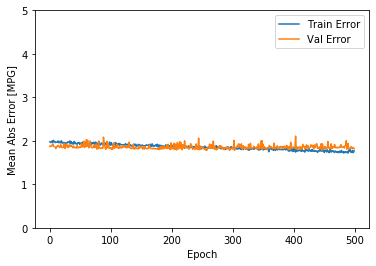

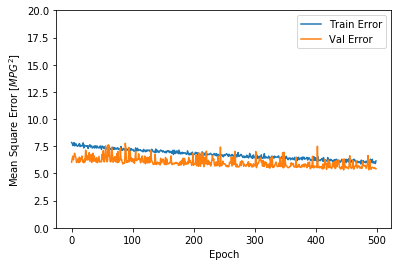

In [231]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)